# Data Design Specialist Technical Assessment - 2024 

**Author:** Eric Githinji  

**Date:** 2025-02-23

## Step 1
The first task was to configure the ggooglesheet API. Next I creeted two function for reading data from the googlesheet and the other function for writig data into the spreadsheet. Check update_data.py and get_data.py.
The next step was the normal data cleaning process which I converted the data to correct datatype e.g dates and numeric.I used the head and info function for data inspection.  

In [3]:
#pip install pandas google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client


In [4]:
from get_data import get_data
from update_data import update_values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Read Data
allcenters_df= get_data(spreadsheet_id="1G6spGBsLR86GSaWcXEPtF8bVi1A51w8DDcZqXK13tCI",range_name='AllCenters!A1:H')
allcenters_df['total_children']= pd.to_numeric(allcenters_df['total_children'], errors='coerce')
collections_raw_df=get_data(spreadsheet_id="1G6spGBsLR86GSaWcXEPtF8bVi1A51w8DDcZqXK13tCI",range_name='Collections_Raw!A1:F')
collections_raw_df['initiation_time']= pd.to_datetime(collections_raw_df['initiation_time'], dayfirst=True)
collections_raw_df['completion_time']= pd.to_datetime(collections_raw_df['completion_time'], dayfirst=True)
collections_raw_df['paid_in'] = collections_raw_df['paid_in'].str.replace(",", "").astype(float)
#collections_raw_df['paid_in']=pd.to_numeric(collections_raw_df['paid_in'], errors='coerce')


In [6]:
allcenters_df.head()

,Center_ID,county,center_type,PilotProgram,PilotModel,PilotModelDescription,PilotPackage,total_children
0,CID_2339137,kiambu,School-Based,Honoring Our Commitment,flat_rate,"Flat Rate, Fee Based on Center Type",Regular,56
1,CID_2514076,kiambu,School-Based,Honoring Our Commitment,flat_rate,"Flat Rate, Fee Based on Center Type",Regular,36
2,CID_2518302,kiambu,School-Based,Honoring Our Commitment,flat_rate,"Flat Rate, Fee Based on Center Type",Regular,56
3,CID_2718093,kiambu,School-Based,Honoring Our Commitment,flat_rate,"Flat Rate, Fee Based on Center Type",Regular,35
4,CID_3731963,kiambu,Home-Based,Honoring Our Commitment,flat_rate,"Flat Rate, Fee Based on Center Type",Regular,24


In [7]:
allcenters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Center_ID              1720 non-null   object
 1   county                 1720 non-null   object
 2   center_type            1720 non-null   object
 3   PilotProgram           1720 non-null   object
 4   PilotModel             1720 non-null   object
 5   PilotModelDescription  1720 non-null   object
 6   PilotPackage           1720 non-null   object
 7   total_children         1720 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 107.6+ KB


In [8]:
collections_raw_df.tail()

,reKeipt_no,completion_time,initiation_time,details,transaction_status,paid_in
5662,SJ26NLGBS2,2024-11-13 10:01:15,2024-11-13 10:01:15,Pay Bill from 254748***438 - Juliet *** Acc. 4...,Completed,1000.0
5663,SJ21N6KW0N,2024-11-13 10:01:15,2024-11-13 10:01:15,Pay Bill from 123454***979 - FELISTUS *** Acc....,Completed,1500.0
5664,SJ25N5F2W3,2024-11-13 10:01:15,2024-11-13 10:01:15,Pay Bill from 011345***985 - John *** Acc. 0267,Completed,1500.0
5665,SJ28N1RA5W,2024-11-13 10:01:15,2024-11-13 10:01:15,Pay Bill from 123453***979 - MAGUIRE *** Acc. ...,Completed,1500.0
5666,SJ26MWPHBY,2024-11-13 10:01:15,2024-11-13 10:01:15,Pay Bill from345124***107 - ELIZAPHAN *** Acc....,Completed,1500.0


In [9]:
collections_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667 entries, 0 to 5666
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reKeipt_no          5667 non-null   object        
 1   completion_time     5667 non-null   datetime64[ns]
 2   initiation_time     5667 non-null   datetime64[ns]
 3   details             5667 non-null   object        
 4   transaction_status  5667 non-null   object        
 5   paid_in             5665 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 265.8+ KB


------------------------------------------

## Step 2
The Join operation can step two much easier. In this we only need to create a table that has the contidion described in step two in the documentation and join those tables with our dataset. It is important to make sure that each condition matches the correct spelling in the data.(This would be much easier if we had a unique identifier for each packege in the dataset.). I used this line of code 'allcenters_df['PilotPackage'].unique().tolist()' to inspect and ensure that the speling match the waht was in  new created tables. 

In [10]:
allcenters_df['PilotPackage'].unique().tolist()

['Regular', 'Silver', 'Gold', 'Bronze']

In [11]:
allcenters_df['center_type']=allcenters_df['center_type'].str.lower()

In [12]:

# Define the data
data = {
    "PilotProgram": [
        "Honoring Our Commitment", "Honoring Our Commitment", "Honoring Our Commitment",
        "Tier_Pilot MMPs", "Tier_Pilot MMPs", "Tier_Pilot MMPs",
        "Tier_Pilot MMPs", "Tier_Pilot MMPs", "Tier_Pilot MMPs"
    ],
    "PilotModel": [ 
        "flat_rate","flat_rate", "flat_rate",  # No PilotModel for "Honoring Our Commitment"
        "flat_rate", "flat_rate", "flat_rate",
        "banded", "banded", "banded"
    ],
    "PilotPackage": [
        "Regular", "Regular", "Regular",  # Honoring Our Commitment uses a standard package
        "Bronze", "Silver", "Gold",
        "Bronze", "Silver", "Gold"
    ],
    "center_type": [
        "center-based", "home-based", "school-based",  # Mapping center types
        "center-based", "home-based", "school-based",
        "center-based", "home-based", "school-based"
    ],
    "Fee_KES": [
        1000, 500, 1500,  # Fixed fees for Honoring Our Commitment
        500, 1000, 1500,  # Flat Rate Fees for Tier_Pilot MMPs
        400, 750, 1000  # Base fee for Banded Rate
    ],
    "First_Children": [
        None, None, None,  # No child-based fee for Honoring Our Commitment
        None, None, None,  # No child-based fee for Flat Rate models
        10, 15, 15  # Children covered in base fee for Banded Rate
    ],
    "Additional_Fee": [
        None, None, None,  # No additional fee for Honoring Our Commitment
        None, None, None,  # No additional fee for Flat Rate models
        50, 50, 50  # Additional fee per extra child for Banded Rate
    ]
}

# Create DataFrame
df = pd.DataFrame(data)
df


,PilotProgram,PilotModel,PilotPackage,center_type,Fee_KES,First_Children,Additional_Fee
0,Honoring Our Commitment,flat_rate,Regular,center-based,1000,NaN,NaN
1,Honoring Our Commitment,flat_rate,Regular,home-based,500,NaN,NaN
2,Honoring Our Commitment,flat_rate,Regular,school-based,1500,NaN,NaN
3,Tier_Pilot MMPs,flat_rate,Bronze,center-based,500,NaN,NaN
4,Tier_Pilot MMPs,flat_rate,Silver,home-based,1000,NaN,NaN
5,Tier_Pilot MMPs,flat_rate,Gold,school-based,1500,NaN,NaN
6,Tier_Pilot MMPs,banded,Bronze,center-based,400,10.0,50.0
7,Tier_Pilot MMPs,banded,Silver,home-based,750,15.0,50.0
8,Tier_Pilot MMPs,banded,Gold,school-based,1000,15.0,50.0


In [13]:
table1 = df[df["PilotProgram"] == "Honoring Our Commitment"][["center_type","PilotProgram", "Fee_KES"]]
table2 = df[df["PilotProgram"] == "Tier_Pilot MMPs"][["PilotProgram", "PilotModel", "PilotPackage", "Fee_KES","First_Children","Additional_Fee"]]
table1

,center_type,PilotProgram,Fee_KES
0,center-based,Honoring Our Commitment,1000
1,home-based,Honoring Our Commitment,500
2,school-based,Honoring Our Commitment,1500


In [14]:
table2

,PilotProgram,PilotModel,PilotPackage,Fee_KES,First_Children,Additional_Fee
3,Tier_Pilot MMPs,flat_rate,Bronze,500,NaN,NaN
4,Tier_Pilot MMPs,flat_rate,Silver,1000,NaN,NaN
5,Tier_Pilot MMPs,flat_rate,Gold,1500,NaN,NaN
6,Tier_Pilot MMPs,banded,Bronze,400,10.0,50.0
7,Tier_Pilot MMPs,banded,Silver,750,15.0,50.0
8,Tier_Pilot MMPs,banded,Gold,1000,15.0,50.0


In [15]:
all_centers_honoring= allcenters_df.merge(table1,on=['center_type','PilotProgram'], how='right')
all_centers_honoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Center_ID              1623 non-null   object
 1   county                 1623 non-null   object
 2   center_type            1623 non-null   object
 3   PilotProgram           1623 non-null   object
 4   PilotModel             1623 non-null   object
 5   PilotModelDescription  1623 non-null   object
 6   PilotPackage           1623 non-null   object
 7   total_children         1623 non-null   int64 
 8   Fee_KES                1623 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 114.2+ KB


In [16]:
all_centers_tier= allcenters_df.merge(table2,on=['PilotProgram','PilotModel','PilotPackage'], how='right')
all_centers_tier.tail()

,Center_ID,county,center_type,PilotProgram,PilotModel,PilotModelDescription,PilotPackage,total_children,Fee_KES,First_Children,Additional_Fee
92,CID_1453016,nakuru,school-based,Tier_Pilot MMPs,banded,"Banded, Variable Fee Based on #Children",Gold,47,1000,15.0,50.0
93,CID_1522723,nakuru,school-based,Tier_Pilot MMPs,banded,"Banded, Variable Fee Based on #Children",Gold,33,1000,15.0,50.0
94,CID_2544186,nakuru,school-based,Tier_Pilot MMPs,banded,"Banded, Variable Fee Based on #Children",Gold,36,1000,15.0,50.0
95,CID_3856753,nakuru,school-based,Tier_Pilot MMPs,banded,"Banded, Variable Fee Based on #Children",Gold,43,1000,15.0,50.0
96,CID_4125674,nakuru,center-based,Tier_Pilot MMPs,banded,"Banded, Variable Fee Based on #Children",Gold,26,1000,15.0,50.0


In [17]:
alldf= pd.concat([all_centers_honoring,all_centers_tier])
alldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1720 entries, 0 to 96
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Center_ID              1720 non-null   object 
 1   county                 1720 non-null   object 
 2   center_type            1720 non-null   object 
 3   PilotProgram           1720 non-null   object 
 4   PilotModel             1720 non-null   object 
 5   PilotModelDescription  1720 non-null   object 
 6   PilotPackage           1720 non-null   object 
 7   total_children         1720 non-null   int64  
 8   Fee_KES                1720 non-null   int64  
 9   First_Children         47 non-null     float64
 10  Additional_Fee         47 non-null     float64
dtypes: float64(2), int64(2), object(7)
memory usage: 161.2+ KB


In [18]:
# Compute Expected Monthly Fee
def calculate_expected_fee(row):
    if pd.isna(row["First_Children"]) or pd.isna(row["Additional_Fee"]) or row["total_children"] <= row["First_Children"]:
        return row["Fee_KES"]
    else:
        extra_children = row["total_children"] - row["First_Children"]
        return row["Fee_KES"] + (extra_children * row["Additional_Fee"])

alldf["ExpectedMonthlyFee"] = alldf.apply(calculate_expected_fee, axis=1)
alldf.head()


,Center_ID,county,center_type,PilotProgram,PilotModel,PilotModelDescription,PilotPackage,total_children,Fee_KES,First_Children,Additional_Fee,ExpectedMonthlyFee
0,CID_4043018,kiambu,center-based,Honoring Our Commitment,flat_rate,"Flat Rate, Fee Based on Center Type",Regular,36,1000,NaN,NaN,1000.0
1,CID_4320681,kiambu,center-based,Honoring Our Commitment,flat_rate,"Flat Rate, Fee Based on Center Type",Regular,35,1000,NaN,NaN,1000.0
2,CID_0942439,mombasa,center-based,Honoring Our Commitment,flat_rate,"Flat Rate, Fee Based on Center Type",Regular,35,1000,NaN,NaN,1000.0
3,CID_1307018,mombasa,center-based,Honoring Our Commitment,flat_rate,"Flat Rate, Fee Based on Center Type",Regular,34,1000,NaN,NaN,1000.0
4,CID_3626689,mombasa,center-based,Honoring Our Commitment,flat_rate,"Flat Rate, Fee Based on Center Type",Regular,5,1000,NaN,NaN,1000.0


In [19]:
alldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1720 entries, 0 to 96
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Center_ID              1720 non-null   object 
 1   county                 1720 non-null   object 
 2   center_type            1720 non-null   object 
 3   PilotProgram           1720 non-null   object 
 4   PilotModel             1720 non-null   object 
 5   PilotModelDescription  1720 non-null   object 
 6   PilotPackage           1720 non-null   object 
 7   total_children         1720 non-null   int64  
 8   Fee_KES                1720 non-null   int64  
 9   First_Children         47 non-null     float64
 10  Additional_Fee         47 non-null     float64
 11  ExpectedMonthlyFee     1720 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 174.7+ KB


In [20]:
#wrtie data
#step1&2
update_values(spreadsheet_id="1G6spGBsLR86GSaWcXEPtF8bVi1A51w8DDcZqXK13tCI",
              range_name='step1&2!A1', 
              dataframe= alldf.drop(columns=["First_Children", "Additional_Fee"]))

17210 cells updated.


{'spreadsheetId': '1G6spGBsLR86GSaWcXEPtF8bVi1A51w8DDcZqXK13tCI',
 'updatedRange': "'step1&2'!A1:J1721",
 'updatedRows': 1721,
 'updatedColumns': 10,
 'updatedCells': 17210}

In [21]:
# Extract the account number using regex
collections_raw_df["Center_ID"] = collections_raw_df["details"].str.extract(r"Acc\.\s*([\d]+)")
# Add "CID_" prefix
collections_raw_df["Center_ID"] = "CID_" + collections_raw_df["Center_ID"]
collections_raw_df.head()


,reKeipt_no,completion_time,initiation_time,details,transaction_status,paid_in,Center_ID
0,SKB6Z8PX1Y,2024-05-01 10:21:36,2024-05-01 10:21:36,Pay Bill from 123454***020 - DeBruyne *** Acc....,Completed,1000.0,CID_0453611
1,SKB3Z8RXBZ,2024-05-01 10:21:36,2024-05-01 10:21:36,Pay Bill from 123451***980 - MAGUIRE *** Acc. ...,Completed,1500.0,CID_0487
2,SKB9Z8K28X,2024-05-01 10:21:36,2024-05-01 10:21:36,Pay Bill from 123451***846 - Martinelli *** Ac...,Completed,1500.0,CID_1655364
3,SKB2Z8KI9E,2024-05-01 10:21:36,2024-05-01 10:21:36,Pay Bill from 254713***066 - MESSI*** Acc. 433...,Completed,1000.0,CID_4335785
4,SKB0Z8U1XZ,2024-05-01 10:21:36,2024-05-01 10:21:36,Merchant Pay Utility Received from 7863463 - E...,Completed,500.0,CID_0340


----------------------------------

## Step 3.2
This set can be done using the joi on the set operation in python

In [22]:
#using set
Wrong_Account_Payments=collections_raw_df[collections_raw_df['Center_ID'].isin(set(collections_raw_df['Center_ID']).difference(set(alldf['Center_ID'])))]
Wrong_Account_Payments.head()

,reKeipt_no,completion_time,initiation_time,details,transaction_status,paid_in,Center_ID
6,SKB9Z98AEJ,2024-05-01 10:21:36,2024-05-01 10:21:36,Pay Bill from 123450***428 - Foden *** Acc. 0039,Completed,1500.0,CID_0039
9,SKB8ZA131Z,2024-05-01 10:21:36,2024-05-01 10:21:36,Pay Bill from 254714***536 - Fernandes*** Acc....,Completed,1500.0,CID_0102
15,SKB4ZAZAFY,2024-05-01 10:21:36,2024-05-01 10:21:36,Pay Bill from 123455***571 - Fernandes *** Acc...,Completed,1500.0,CID_0024
30,SKB5ZK9JXL,2024-05-01 10:21:36,2024-05-01 10:21:36,Pay Bill Online from 123455***290 - CECILIA **...,Completed,1000.0,CID_0111
34,SKB0ZY2VPE,2024-05-01 10:21:36,2024-05-01 10:21:36,Pay Bill from 123459***861 - BRIGID *** Acc. 0085,Completed,300.0,CID_0085


In [23]:
# Using join
Wrong_Account_Payments = collections_raw_df.merge(
    alldf[['Center_ID']],  # Only Center_ID column from alldf
    on='Center_ID',
    how='left',
    indicator=True  # Adds a column to indicate matches
).query('_merge == "left_only"').drop(columns=['_merge'])
Wrong_Account_Payments.head()

,reKeipt_no,completion_time,initiation_time,details,transaction_status,paid_in,Center_ID
6,SKB9Z98AEJ,2024-05-01 10:21:36,2024-05-01 10:21:36,Pay Bill from 123450***428 - Foden *** Acc. 0039,Completed,1500.0,CID_0039
9,SKB8ZA131Z,2024-05-01 10:21:36,2024-05-01 10:21:36,Pay Bill from 254714***536 - Fernandes*** Acc....,Completed,1500.0,CID_0102
15,SKB4ZAZAFY,2024-05-01 10:21:36,2024-05-01 10:21:36,Pay Bill from 123455***571 - Fernandes *** Acc...,Completed,1500.0,CID_0024
30,SKB5ZK9JXL,2024-05-01 10:21:36,2024-05-01 10:21:36,Pay Bill Online from 123455***290 - CECILIA **...,Completed,1000.0,CID_0111
34,SKB0ZY2VPE,2024-05-01 10:21:36,2024-05-01 10:21:36,Pay Bill from 123459***861 - BRIGID *** Acc. 0085,Completed,300.0,CID_0085


In [24]:
 # Convert timestamps to string
for col in Wrong_Account_Payments.select_dtypes(include=["datetime64[ns]"]).columns:
    Wrong_Account_Payments[col] = Wrong_Account_Payments[col].astype(str)
update_values(spreadsheet_id="1G6spGBsLR86GSaWcXEPtF8bVi1A51w8DDcZqXK13tCI",
              range_name='Wrong_Account_Payments!A1', 
              dataframe= Wrong_Account_Payments)

10304 cells updated.


{'spreadsheetId': '1G6spGBsLR86GSaWcXEPtF8bVi1A51w8DDcZqXK13tCI',
 'updatedRange': 'Wrong_Account_Payments!A1:G1472',
 'updatedRows': 1472,
 'updatedColumns': 7,
 'updatedCells': 10304}

------------------------------

In [25]:
filtered_collections = collections_raw_df.merge(
    alldf[['Center_ID']],  # Only Center_ID column from alldf
    on='Center_ID',
    how='inner'  # Keeps only matching Center_IDs
)
filtered_collections['month']= pd.to_datetime(pd.to_datetime(filtered_collections['completion_time']).dt.date)
# Extract Year-Month format (YYYY-MM)
filtered_collections['month'] = filtered_collections['month'].dt.to_period('M')
filtered_collections.tail()

,reKeipt_no,completion_time,initiation_time,details,transaction_status,paid_in,Center_ID,month
4191,SJ26NLGBS2,2024-11-13 10:01:15,2024-11-13 10:01:15,Pay Bill from 254748***438 - Juliet *** Acc. 4...,Completed,1000.0,CID_4756671,2024-11
4192,SJ21N6KW0N,2024-11-13 10:01:15,2024-11-13 10:01:15,Pay Bill from 123454***979 - FELISTUS *** Acc....,Completed,1500.0,CID_0021582,2024-11
4193,SJ25N5F2W3,2024-11-13 10:01:15,2024-11-13 10:01:15,Pay Bill from 011345***985 - John *** Acc. 0267,Completed,1500.0,CID_0267,2024-11
4194,SJ28N1RA5W,2024-11-13 10:01:15,2024-11-13 10:01:15,Pay Bill from 123453***979 - MAGUIRE *** Acc. ...,Completed,1500.0,CID_1045525,2024-11
4195,SJ26MWPHBY,2024-11-13 10:01:15,2024-11-13 10:01:15,Pay Bill from345124***107 - ELIZAPHAN *** Acc....,Completed,1500.0,CID_4214197,2024-11


In [26]:
filtered_collections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4196 entries, 0 to 4195
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reKeipt_no          4196 non-null   object        
 1   completion_time     4196 non-null   datetime64[ns]
 2   initiation_time     4196 non-null   datetime64[ns]
 3   details             4196 non-null   object        
 4   transaction_status  4196 non-null   object        
 5   paid_in             4196 non-null   float64       
 6   Center_ID           4196 non-null   object        
 7   month               4196 non-null   period[M]     
dtypes: datetime64[ns](2), float64(1), object(4), period[M](1)
memory usage: 262.4+ KB


In [27]:
filtered_collections['SumPaid']=filtered_collections.groupby(['Center_ID', 'month'])['paid_in'].cumsum()
# Add StartBalance column (rolling sum of previous month's ending balance)
filtered_collections['StartBalance'] = filtered_collections.groupby('Center_ID')['SumPaid'].shift().fillna(0).groupby(filtered_collections['Center_ID']).cumsum()
 #Compute EndBalance (for reference)
filtered_collections['EndBalance'] = filtered_collections['StartBalance'] + filtered_collections['SumPaid']
filtered_collections=filtered_collections.merge(alldf[['Center_ID', 'ExpectedMonthlyFee']], on='Center_ID', how='left')
filtered_collections['AllotmentRat']= np.array(filtered_collections['StartBalance'])/np.array(filtered_collections['ExpectedMonthlyFee'])
filtered_collections.head()

,reKeipt_no,completion_time,initiation_time,details,transaction_status,paid_in,Center_ID,month,SumPaid,StartBalance,EndBalance,ExpectedMonthlyFee,AllotmentRat
0,SKB6Z8PX1Y,2024-05-01 10:21:36,2024-05-01 10:21:36,Pay Bill from 123454***020 - DeBruyne *** Acc....,Completed,1000.0,CID_0453611,2024-05,1000.0,0.0,1000.0,1500.0,0.0
1,SKB3Z8RXBZ,2024-05-01 10:21:36,2024-05-01 10:21:36,Pay Bill from 123451***980 - MAGUIRE *** Acc. ...,Completed,1500.0,CID_0487,2024-05,1500.0,0.0,1500.0,1500.0,0.0
2,SKB9Z8K28X,2024-05-01 10:21:36,2024-05-01 10:21:36,Pay Bill from 123451***846 - Martinelli *** Ac...,Completed,1500.0,CID_1655364,2024-05,1500.0,0.0,1500.0,1500.0,0.0
3,SKB2Z8KI9E,2024-05-01 10:21:36,2024-05-01 10:21:36,Pay Bill from 254713***066 - MESSI*** Acc. 433...,Completed,1000.0,CID_4335785,2024-05,1000.0,0.0,1000.0,1000.0,0.0
4,SKB0Z8U1XZ,2024-05-01 10:21:36,2024-05-01 10:21:36,Merchant Pay Utility Received from 7863463 - E...,Completed,500.0,CID_0340,2024-05,500.0,0.0,500.0,1000.0,0.0


-------------------------------------------------------

## Step 3.3

In [28]:
monthly_payments = (
    filtered_collections.groupby(["Center_ID", "month"])["paid_in"].sum().reset_index()
)
monthly_payments.rename(columns={"paid_in": "SumPaid"}, inplace=True)
ledger_df = monthly_payments.merge(alldf[["Center_ID", "ExpectedMonthlyFee"]], on="Center_ID", how="left")
monthly_payments.head()

,Center_ID,month,SumPaid
0,CID_0000755,2024-05,150.0
1,CID_0000755,2024-08,500.0
2,CID_0000755,2024-09,500.0
3,CID_0005076,2024-05,500.0
4,CID_0005076,2024-07,1000.0


To calculate the startin balance we need to calculate the previous month balance. The initial value is 0. If the first start balnce is 0+ the sum paid. if the value is less than the expected pay, it remains as our new value for the previous month balnce else for the previous month balance we subtract sum paid from expected pay. To achieve this we use a nested for loop. 

In [29]:
# Sorting to ensure correct month-wise calculation per center
ledger_df.sort_values(by=["Center_ID", "month"], inplace=True)
# Initialize new columns with zeroes
ledger_df["StartBalance"] = 0
ledger_df["PreviousPayment"] = 0
# Process each Center_ID separately therefore we need to group_by
for center_id, group in ledger_df.groupby("Center_ID"):
    prev_payment = 0  # First PreviousPayment = 0
    for i, row in group.iterrows():
        # Calculate StartBalance
        ledger_df.loc[i, "StartBalance"] = prev_payment + row["SumPaid"]
        # Calculate PreviousPayment
        if ledger_df.loc[i, "StartBalance"] < row["ExpectedMonthlyFee"]:
            ledger_df.loc[i, "PreviousPayment"] = ledger_df.loc[i, "StartBalance"]
        else:
            ledger_df.loc[i, "PreviousPayment"] =  ledger_df.loc[i, "StartBalance"]-row["ExpectedMonthlyFee"] 
        # Update Previous Payment for next month
        prev_payment = ledger_df.loc[i, "PreviousPayment"]

ledger_df.head()

,Center_ID,month,SumPaid,ExpectedMonthlyFee,StartBalance,PreviousPayment
0,CID_0000755,2024-05,150.0,500.0,150,150
1,CID_0000755,2024-08,500.0,500.0,650,150
2,CID_0000755,2024-09,500.0,500.0,650,150
3,CID_0005076,2024-05,500.0,500.0,500,0
4,CID_0005076,2024-07,1000.0,500.0,1000,500


In [30]:
ledger_df["AllotmentRate"] = ledger_df["StartBalance"] / ledger_df["ExpectedMonthlyFee"]
ledger_df.tail()

,Center_ID,month,SumPaid,ExpectedMonthlyFee,StartBalance,PreviousPayment,AllotmentRate
3741,CID_5955671,2024-06,1500.0,1500.0,1500,0,1.0
3742,CID_5955671,2024-07,1500.0,1500.0,1500,0,1.0
3743,CID_5955671,2024-08,1500.0,1500.0,1500,0,1.0
3744,CID_5955671,2024-09,1500.0,1500.0,1500,0,1.0
3745,CID_5955671,2024-10,1500.0,1500.0,1500,0,1.0


In [31]:
def calculate_alloted_amount(row):
    if row["AllotmentRate"] >= 1.0:
        return row["ExpectedMonthlyFee"]
    else:
        return row["StartBalance"]
ledger_df["AllotedAmount"] = ledger_df.apply(calculate_alloted_amount, axis=1)
ledger_df.head()

,Center_ID,month,SumPaid,ExpectedMonthlyFee,StartBalance,PreviousPayment,AllotmentRate,AllotedAmount
0,CID_0000755,2024-05,150.0,500.0,150,150,0.3,150.0
1,CID_0000755,2024-08,500.0,500.0,650,150,1.3,500.0
2,CID_0000755,2024-09,500.0,500.0,650,150,1.3,500.0
3,CID_0005076,2024-05,500.0,500.0,500,0,1.0,500.0
4,CID_0005076,2024-07,1000.0,500.0,1000,500,2.0,500.0


In [32]:
def calculate_benefit(row):
    if row["AllotmentRate"] >= 1.0:
        return 'Full'
    else:
        return 'None'

ledger_df["Benefit_Allotment"] = ledger_df.apply(calculate_benefit, axis=1)
ledger_df['EndBalance']= ledger_df['StartBalance']- ledger_df['AllotedAmount']
ledger_df['ActualRate']= ledger_df['AllotedAmount']/ledger_df['ExpectedMonthlyFee']
ledger_df.head()

,Center_ID,month,SumPaid,ExpectedMonthlyFee,StartBalance,PreviousPayment,AllotmentRate,AllotedAmount,Benefit_Allotment,EndBalance,ActualRate
0,CID_0000755,2024-05,150.0,500.0,150,150,0.3,150.0,None,0.0,0.3
1,CID_0000755,2024-08,500.0,500.0,650,150,1.3,500.0,Full,150.0,1.0
2,CID_0000755,2024-09,500.0,500.0,650,150,1.3,500.0,Full,150.0,1.0
3,CID_0005076,2024-05,500.0,500.0,500,0,1.0,500.0,Full,0.0,1.0
4,CID_0005076,2024-07,1000.0,500.0,1000,500,2.0,500.0,Full,500.0,1.0


In [33]:
 # Convert timestamps to string
ledger_df_print= ledger_df.copy()
ledger_df_print['month'] = ledger_df_print['month'].astype(str)
update_values(spreadsheet_id="1G6spGBsLR86GSaWcXEPtF8bVi1A51w8DDcZqXK13tCI",
              range_name='step_3!A1', 
              dataframe= ledger_df_print)

41217 cells updated.


{'spreadsheetId': '1G6spGBsLR86GSaWcXEPtF8bVi1A51w8DDcZqXK13tCI',
 'updatedRange': 'step_3!A1:K3747',
 'updatedRows': 3747,
 'updatedColumns': 11,
 'updatedCells': 41217}

---------------------------------------

## Step 4

In [34]:
#Average collection rate for each month 
avg_month= ledger_df.groupby('month').agg({'ActualRate': 'mean'}).reset_index()
avg_month

,month,ActualRate
0,2024-05,0.895503
1,2024-06,0.950947
2,2024-07,0.971084
3,2024-08,0.963294
4,2024-09,0.967849
5,2024-10,0.978703
6,2024-11,0.971988


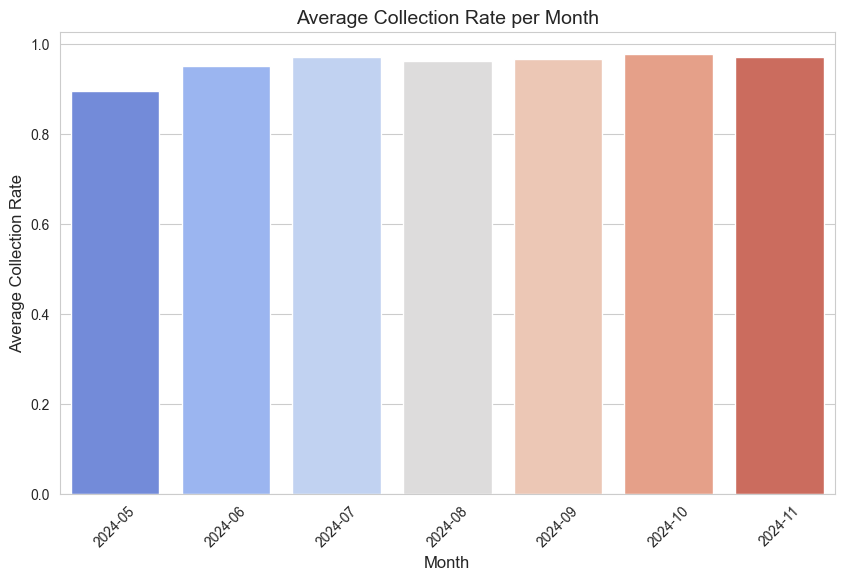

In [35]:

avg_month["month"] = avg_month["month"].astype(str)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="month", y="ActualRate", data=avg_month, palette="coolwarm", hue='month')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Collection Rate", fontsize=12)
plt.title("Average Collection Rate per Month", fontsize=14)

plt.xticks(rotation=45)
plt.show()

The plot shows a stready increase in collection rate from may to november. The highest collection rate was in the month of october weith an averge value of 0.978703. 

To get the county data, a left join was used. 

In [36]:
county_df=ledger_df[['Center_ID','month', 'ActualRate']].merge(alldf[['Center_ID','county']], on ='Center_ID', how='left')
county_df=county_df.groupby('county').agg({'ActualRate': 'mean'}).reset_index()
county_df

,county,ActualRate
0,kajiado,0.955124
1,kiambu,0.989540
2,kisumu,0.974069
3,machakos,0.971286
4,mombasa,0.952741
5,nairobi,0.964651
6,nakuru,0.906531
7,uasin gishu,0.958974


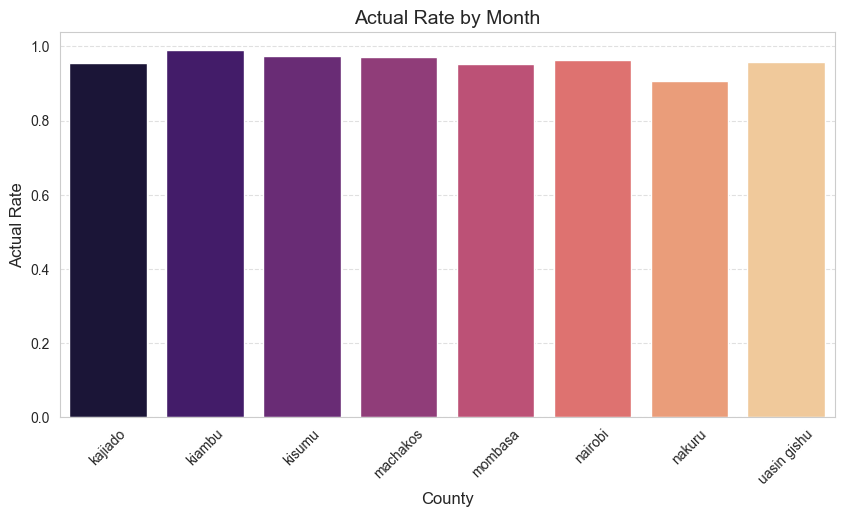

In [37]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x='county', y="ActualRate",data=county_df, color="royalblue", palette="magma", hue='county')
plt.xlabel("County", fontsize=12)
plt.ylabel("Actual Rate", fontsize=12)
plt.title("Actual Rate by Month", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

The above plot show that kiambu has the highest collection rate with nakuru having the lowest collection rate. 

The code below merge the legger_df on alldf using the Center_ID column. I have selected the neededcolumns only. 

In [38]:
perform_df=ledger_df[['Center_ID','month', 'ActualRate']].merge(alldf[['Center_ID','PilotProgram','PilotPackage','center_type']], 
                                                                on ='Center_ID', how='left')

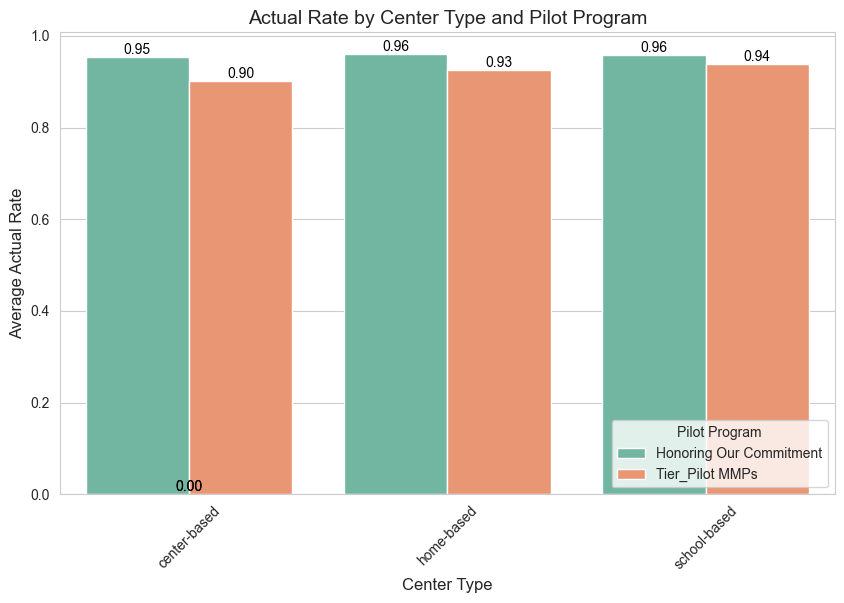

In [39]:
# Aggregate by center_type and PilotProgram
grouped_df = perform_df.groupby(["center_type", "PilotProgram"], as_index=False)["ActualRate"].mean()
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="center_type", y="ActualRate", hue="PilotProgram", data=grouped_df, palette="Set2")
plt.xlabel("Center Type", fontsize=12)
plt.ylabel("Average Actual Rate", fontsize=12)
plt.title("Actual Rate by Center Type and Pilot Program", fontsize=14)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=10, color="black")
plt.legend(title="Pilot Program")
plt.show()

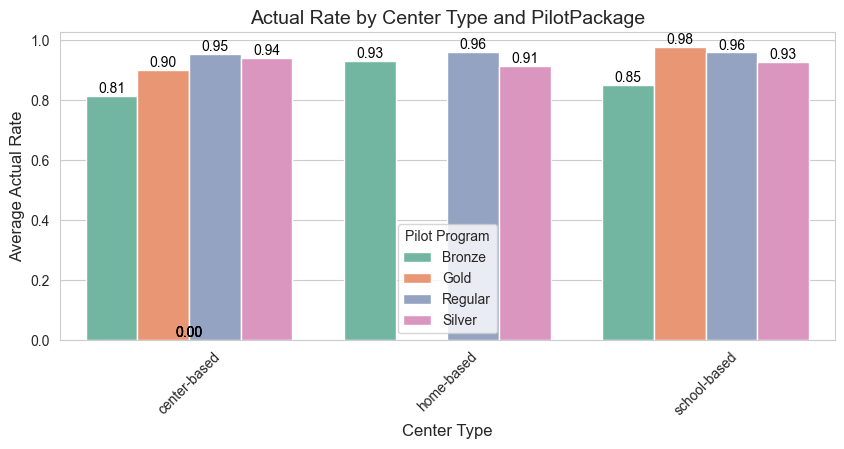

In [40]:
# Aggregate by center_type and PilotProgram
grouped_df = perform_df.groupby(["center_type", "PilotPackage"], as_index=False)["ActualRate"].mean()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))
ax = sns.barplot(x="center_type", y="ActualRate", hue="PilotPackage", data=grouped_df, palette="Set2")

plt.xlabel("Center Type", fontsize=12)
plt.ylabel("Average Actual Rate", fontsize=12)
plt.title("Actual Rate by Center Type and PilotPackage", fontsize=14)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=10, color="black")
plt.legend(title="Pilot Program")
plt.show()

The plot above shows that bronze performed well in home_based center_types with an average collection rate of 0.93. On the other hand bronze performed poorly in center-based and schoole-based center-type with an average score of 0.81 and 0.85 respectively. Goldperformance was best for the school-based center_types with an average score of 0.98. Regular shows a good performance in all the center_types. 

-------------------------------------------